In [1]:
pip install torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 70.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 106.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [1]:
pip -q install torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 33.6 MB/s eta 0:00:00


In [2]:
pip -q install pyg_lib torch_scatter torch_sparse torch_cluster torch_spline_conv -f https://data.pyg.org/whl/torch-2.4.0+cu124.html

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 56.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 36.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 77.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 995.9/995.9 kB 48.1 MB/s eta 0:00:00


In [3]:
pip -q install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.9/34.9 MB 45.4 MB/s eta 0:00:00


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from rdkit import Chem
from rdkit.Chem import Draw
import networkx as nx
import torch
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader
from torch_geometric.utils import to_networkx
import torch.nn.functional as F # This imports functional operations such as activation functions, loss functions etc..
from torch_geometric.nn import GINEConv, global_mean_pool
from torch_geometric.nn.models import MLP
import warnings
warnings.filterwarnings("ignore")

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Welcome to my notebook!

In this notebook, i'm learning how to build a Graph neural network to predict the properties of Polymers

The dataset contains polymer molecules as a string text and its properties namely; Radius of gyration, density, Fractional free volume, thermal conductivity, glass transition temperature.

The first step after installing and importing the necessary libraries is to convert the smiles string to graphs. GNNs are specifically built to work with graph data

**Load the data file**

In [7]:
data1 = pd.read_csv('/content/drive/MyDrive/Polymer Molecules Dataset/train.csv')
data2 = pd.read_csv('/content/drive/MyDrive/Polymer Molecules Dataset/test.csv')
data3 = pd.read_csv('/content/drive/MyDrive/Polymer Molecules Dataset/sample_submission.csv')
data1.head()

,id,SMILES,Tg,FFV,Tc,Density,Rg
0,87817,*CC(*)c1ccccc1C(=O)OCCCCCC,NaN,0.374645,0.205667,NaN,NaN
1,106919,*Nc1ccc([C@H](CCC)c2ccc(C3(c4ccc([C@@H](CCC)c5...,NaN,0.370410,NaN,NaN,NaN
2,388772,*Oc1ccc(S(=O)(=O)c2ccc(Oc3ccc(C4(c5ccc(Oc6ccc(...,NaN,0.378860,NaN,NaN,NaN
3,519416,*Nc1ccc(-c2c(-c3ccc(C)cc3)c(-c3ccc(C)cc3)c(N*)...,NaN,0.387324,NaN,NaN,NaN
4,539187,*Oc1ccc(OC(=O)c2cc(OCCCCCCCCCOCC3CCCN3c3ccc([N...,NaN,0.355470,NaN,NaN,NaN


In [8]:
#create copies of the original data files
df1 = data1.copy()
df2 = data2.copy()
sub = data3.copy()

Simplified Molecular Input Line Entry System (SMILES) are string-like text representation of the structure of a molecule. Some SMILES can be written differently but they represent the same molecule. For example:

Ethanol -> CC(O)

The same Ethanol can be written like this (O)CC.

The SMILES strings are different but both are Ethanol. Thus it's important to address this before building a model so that the model won't think that the SMILES are two different molecules.

To handle this, it is important to canonize the SMILES strings in the dataset. Thus, converting them to canonical SMILES.

By Canonizing the smiles, we ensure that the SMILES string are the same for a molecule. This means that any molecule that was formely represented with two or more different strings will be represented with the same SMILES string.

In [9]:
#convert smiles strings to canonical smiles
def convert_to_canonical_smiles(smiles):
  try:
    mol = Chem.MolFromSmiles(smiles)
    if mol:
      return Chem.MolToSmiles(mol, canonical=True)
    return smiles

  except:
    return smiles

df1['SMILES'] = df1['SMILES'].apply(convert_to_canonical_smiles)
df2['SMILES'] = df2['SMILES'].apply(convert_to_canonical_smiles)

In [10]:
#check for duplicate smiles strings
df1['SMILES'].duplicated().any()

np.False_

In [11]:
#Remove entries with missing target values
feature_cols = [col for col in df1.columns if col not in ['Tg', 'Tc', 'FFV', 'Rg', 'Density']]

#create 5 datasets for each target
tg_df = df1[feature_cols + ['Tg']]
tg_df = tg_df.dropna()

tc_df = df1[feature_cols + ['Tc']]
tc_df = tc_df.dropna()

ffv_df = df1[feature_cols + ['FFV']]
ffv_df = ffv_df.dropna()

rg_df = df1[feature_cols + ['Rg']]
rg_df = rg_df.dropna()

density_df = df1[feature_cols + ['Density']]
density_df = density_df.dropna()

Convert the SMILES to graph data and extract features for training a Graph Neural Network!

In [12]:
#convert smiles and targets to graphs

def mol_to_graph(smiles, target):
  mol = Chem.MolFromSmiles(smiles)
  if mol is None:
    return None  #This helps to skip any invalid smiles in the data.

  #======================Extract node features(Here the atoms represent the nodes)=======================#
  atom_features = []
  for atom in mol.GetAtoms():
    atomic_num = atom.GetAtomicNum()  #atomic number of each atom in the molecule
    degree = atom.GetDegree() #The number of atoms bonded to a specific atom (i.e number of neighbouring atoms)
    formal_charge = atom.GetFormalCharge() #The atom's charge
    hybridization = int(atom.GetHybridization()) #The hybridization state of each atom. int() converts enum(hybridization object) like sp2 to 2
    is_aromatic = int(atom.GetIsAromatic()) # checks if the atom is part of an aromatic ring
    in_ring = int(atom.IsInRing()) # checks if the atom is part of a non-aromatic ring i.e an aliphatic ring
    num_hs = atom.GetTotalNumHs() # The number of hydrogen atoms attached to it
    h_donor = int(atom.GetSymbol() in ['N','O'] and atom.GetTotalNumHs()>0) #is the atom a h-bond donor
    h_acceptor = int(atom.GetSymbol() in ['N','O']) # is the atom a h-bond acceptor
    is_chiral = 1 if atom.HasProp('_CIPCode') else 0 #checks if a molecule has a chiral center

    #collate all the features and append them to a list
    atom_features.append([atomic_num, degree, formal_charge, hybridization, is_aromatic, in_ring, num_hs, h_donor, h_acceptor, is_chiral])

  #convert the node(atom) features to tensor
  x = torch.tensor(np.array(atom_features), dtype=torch.float32) # Convert to numpy array first to ensure correct shape

  #======================Extract Edge features(Edges here represents the bond between atoms)===========================#
  # The edge index shows the bonds connect atoms (for example C1 is bonded to C2, C3 is bonded to C4 etc...)
  edge_index = [] # shows the structure of the graph
  edge_attrs = [] # holds the features of the bonds
  for bond in mol.GetBonds():
    i = bond.GetBeginAtomIdx() #Get the index of the atom that starts the bond
    j = bond.GetEndAtomIdx() #Get the index of the atom that ends that bond
    bond_type = float(bond.GetBondTypeAsDouble()) #checks if the bond is a single(1.0), double(2.0), triple bond(3.0), or aromatic bond(1.5)
    is_conjugated = int(bond.GetIsConjugated()) #checks if a bond is conjugated
    is_aromatic = int(bond.GetIsAromatic()) #Encodes the aromaticity of a bond
    in_ring = int(bond.IsInRing()) # checks if a bond is in a ring structure
    # The stereo_features checks for bond stereochemistry
    stereo_feats = [
        int(bond.GetStereo() == Chem.rdchem.BondStereo.STEREONONE),
        int(bond.GetStereo() == Chem.rdchem.BondStereo.STEREOANY),
        int(bond.GetStereo() == Chem.rdchem.BondStereo.STEREOZ), #ciz
        int(bond.GetStereo() == Chem.rdchem.BondStereo.STEREOE), #Trans
    ]
    #Collate all edge features
    edge_feature = [bond_type, is_conjugated, is_aromatic, in_ring, stereo_feats[0], stereo_feats[1], stereo_feats[2], stereo_feats[3]]

    edge_index += [[i,j],[j,i]] #This indiates that there is a bond from atom i to j and from j to i. (Undirected graph as its the case for chemical bonds)
    edge_attrs += [edge_feature, edge_feature]

  if not edge_index: # Handle molecules with no bonds (e.g., single atoms)
      edge_index = torch.empty(2, 0, dtype=torch.long)
      edge_attr = torch.empty(0, 4, dtype=torch.float32)
  else:
      edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()  #shape of the tensor ==> [2, num_of_edges]
      edge_attr = torch.tensor(edge_attrs, dtype=torch.float32) # Ensure float32 dtype

  #convert the target to tensor
  y = torch.tensor([target], dtype=torch.float32) # Ensure float32 dtype

  # Check if the graph has zero nodes
  if x.size(0) == 0:
      return None

  return Data(x=x, edge_index=edge_index, edge_attr=edge_attr, y=y) #graph

In [13]:
#Apply the mol_to_graph function to each dataset
tg_data = [mol_to_graph(smiles, target) for smiles, target in zip(tg_df['SMILES'], tg_df['Tg'])]
tc_data = [mol_to_graph(smiles, target) for smiles, target in zip(tc_df['SMILES'], tc_df['Tc'])]
ffv_data = [mol_to_graph(smiles, target) for smiles, target in zip(ffv_df['SMILES'], ffv_df['FFV'])]
rg_data = [mol_to_graph(smiles, target) for smiles, target in zip(rg_df['SMILES'], rg_df['Rg'])]
density_data = [mol_to_graph(smiles, target) for smiles, target in zip(density_df['SMILES'], density_df['Density'])]

In [14]:
#Ensure all molecules are converted to graphs, remove any molecules that fails to be converted to a graph
tg_data = [graph for graph in tg_data if graph is not None]
tc_data = [graph for graph in tc_data if graph is not None]
ffv_data = [graph for graph in ffv_data if graph is not None]
rg_data = [graph for graph in rg_data if graph is not None]
density_data = [graph for graph in density_data if graph is not None]

In [15]:
tg_data[0:5]

[Data(x=[15, 10], edge_index=[2, 28], edge_attr=[28, 8], y=[1]),
 Data(x=[16, 10], edge_index=[2, 30], edge_attr=[30, 8], y=[1]),
 Data(x=[12, 10], edge_index=[2, 22], edge_attr=[22, 8], y=[1]),
 Data(x=[38, 10], edge_index=[2, 78], edge_attr=[78, 8], y=[1]),
 Data(x=[34, 10], edge_index=[2, 74], edge_attr=[74, 8], y=[1])]

The data above shows us how many nodes, node features, edges and edge features are in the molecules.

Let's take the first molecule as an example

The first molecule (the first molecule in the image below) has 15 nodes (carbon atoms), ten features about the carbon atoms, 28 bonds (the bond between node i to node j, the bond between node j to node i are counted as edges i.e node i to node j is 1 bond, node j to node i is another bond. It's actually 14 bonds but chemical bonds are undirected meaning as node i is bonded to node j, node j is also bonded to node i), and 8 features about the bonds

Lets visualize the structure of some molecules and their graph representations

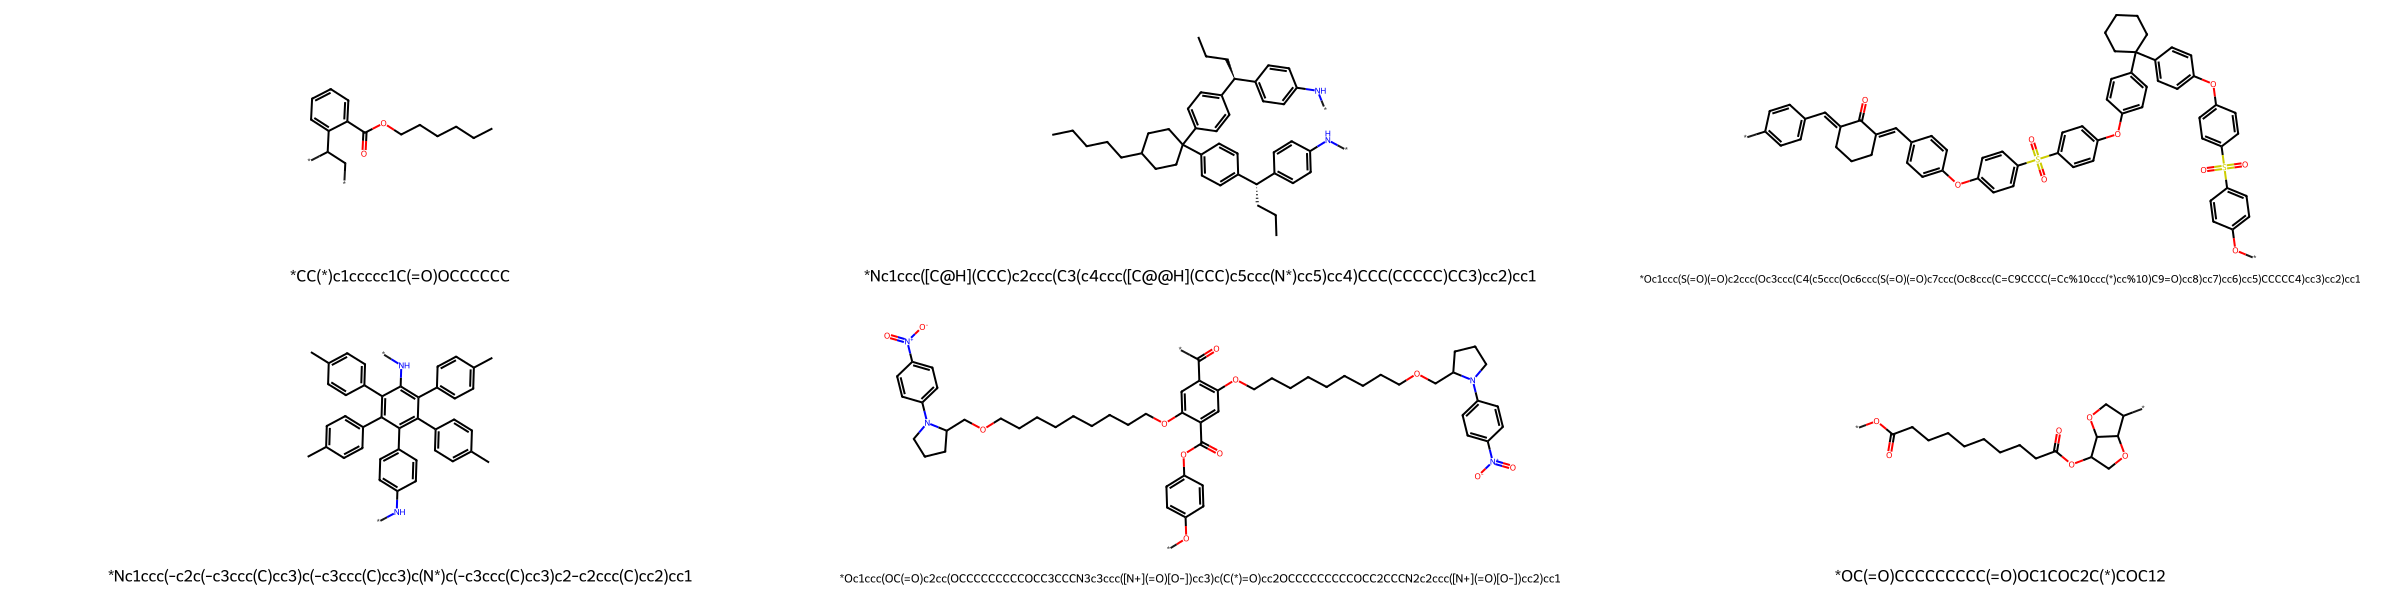

In [16]:
#Visualize the structure of the first six molecules in the data
mols_list = []

for smiles in df1['SMILES'].head(6):
  mol = Chem.MolFromSmiles(smiles)
  mols_list.append(mol)

mol_imgs = Draw.MolsToGridImage(mols_list, molsPerRow=3, subImgSize=(800,300), legends=[Chem.MolToSmiles(mol) for mol in mols_list])
mol_imgs

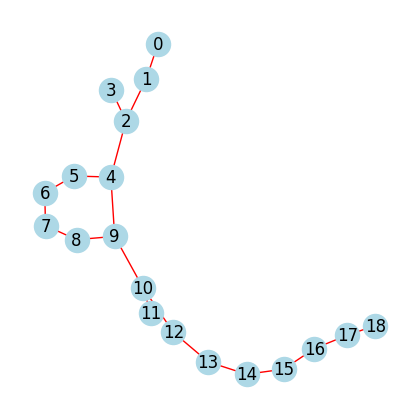

In [17]:
#Lets visualize the graph structure
mol_graph = ffv_data[0]
#convert graph to networkx
graph_net = to_networkx(mol_graph, to_undirected=True)

#label nodes by number
labels = {i: int(mol_graph.x[i][0]) for i in range(mol_graph.num_nodes)}

plt.figure(figsize=(4,4))
pos = nx.spring_layout(graph_net, seed=42)
nx.draw(graph_net, pos, with_labels=True, node_color='lightblue', edge_color='red')
plt.show()

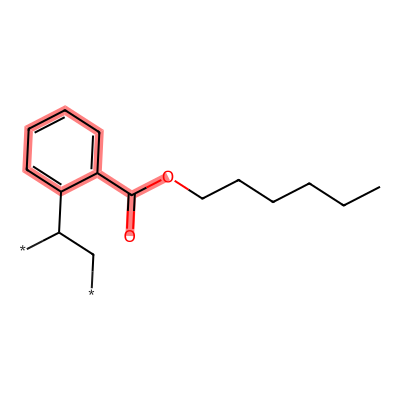

In [18]:
#lets highlight some conjugate bonds in a molecule
sm = df1['SMILES'].iloc[0]
pol = Chem.MolFromSmiles(sm)

#highlight conjugate bonds
conj_bonds = [bond.GetIdx() for bond in pol.GetBonds() if bond.GetIsConjugated()]
img = Draw.MolToImage(pol, highlightBonds=conj_bonds, size=(400,400))
img

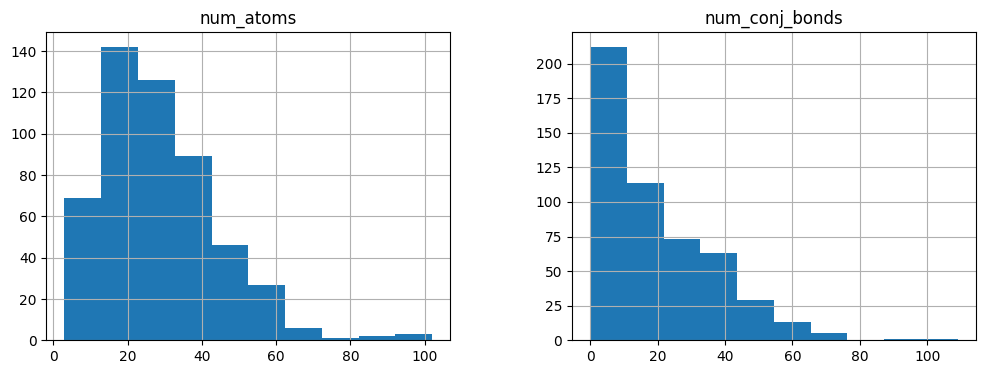

In [19]:
#check the distribution of the number of atoms and number of conjugate bonds in tg_df

df = tg_df.copy()
df['num_atoms'] = df['SMILES'].apply(lambda smi: Chem.MolFromSmiles(smi).GetNumAtoms())
df['num_conj_bonds'] = df['SMILES'].apply(
    lambda smi: sum([bond.GetIsConjugated() for bond in Chem.MolFromSmiles(smi).GetBonds()])
)

df[['num_atoms', 'num_conj_bonds']].hist(figsize=(12, 4))
plt.show()


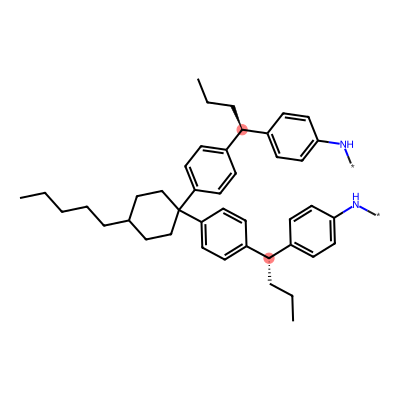

In [20]:
mol = Chem.MolFromSmiles(df1['SMILES'][1])
Chem.AssignStereochemistry(mol, force=True, cleanIt=True)

# Get indices of chiral atoms
chiral_centers = [atom.GetIdx() for atom in mol.GetAtoms() if atom.HasProp('_CIPCode')]

# Draw and highlight atoms with chiral centers (i.e atoms bonded to 4 different groups)
imgz = Draw.MolToImage(mol, highlightAtoms=chiral_centers, size=(400, 400))
imgz

Build a Simple GNN Model

Normally, i would have used Graph convolutional Network (GCN) as the model, but i found out that GCN doesn't utilize edge(bond) features during training. Hence, i chose to use GINEConv (Graph Isomorphism neural network with Edge features) which utilizes edge features during training.

In [39]:
#Define a class for the custom GINEConv model
class PolyGINEModel(torch.nn.Module):
  #object constructor-- to create objects
  def __init__(self, in_channels, edge_dim, hidden_channels):
    super(PolyGINEModel, self).__init__() # This enables the custom model to inherit all the functionalities a PyTorch Model should have from torch.nn.Module
    #For a GINEConv model, its architecture requires a Multi-layer Perceptron layer (MLP) to transform the features to a form the GINEConv layer can work with.
    # The transformed features is then passed to the convolution layer.
    # For this model, i created 3 MLP and Conv layers.
    self.mlp1 = MLP([in_channels, hidden_channels, hidden_channels], norm=None)
    self.conv1 = GINEConv(self.mlp1, edge_dim=edge_dim)

    self.mlp2 = MLP([hidden_channels, hidden_channels, hidden_channels], norm=None)
    self.conv2 = GINEConv(self.mlp2, edge_dim=edge_dim)

    self.mlp3 = MLP([hidden_channels, hidden_channels, hidden_channels], norm=None)
    self.conv3 = GINEConv(self.mlp3, edge_dim=edge_dim)

    self.output = torch.nn.Linear(hidden_channels, 1) #predicted output

  #Forward Propagation just like in a normal neural network. This is like the heart of the model. This is where the input is processed and the output is predicted.
  # Also this is where message passing occurs
  def forward(self, x, edge_index, edge_attr, batch):
    x = F.relu(self.conv1(x, edge_index, edge_attr)) #F.relu - apply activation function over the convolutional layers
    x = F.relu(self.conv2(x, edge_index, edge_attr))
    x = F.relu(self.conv3(x, edge_index, edge_attr))
    x = global_mean_pool(x, batch) # Aggregates all the nodes of each graph(molecule)
    return self.output(x) #predicted output


#Train the model and feed it with graphs in batches
def train(model, loader, optimizer, loss_fn):
  model.train()
  total_loss = 0
  for batch in loader:
    optimizer.zero_grad() #clear the gradients after each batch
    out = model(batch.x, batch.edge_index, batch.edge_attr, batch.batch) # forward propagation
    loss = loss_fn(out.squeeze(), batch.y) #computes loss
    loss.backward() #Backward propagation
    optimizer.step() #update model weights
    total_loss += loss.item()
  return total_loss / len(loader) #return the average loss for all batches

#Evaluate the model
def evaluate(model, loader, loss_fn):
  model.eval()
  total_loss = 0
  #Here there is no model weight update or computing gradients unlike during model training
  with torch.no_grad():
    for batch in loader:
      out = model(batch.x, batch.edge_index, batch.edge_attr, batch.batch)
      loss = loss_fn(out.squeeze(), batch.y)
      total_loss += loss.item()
    return total_loss / len(loader)

#Perform KFold cross-validation
def cross_validate(dataset, k=5, lr=0.01, hidden_channels=64, epochs=200):
  kf = KFold(n_splits=k, shuffle=True, random_state=11)
  fold_scores = []
  for fold, (train_idx, val_idx) in enumerate(kf.split(dataset)):
    train_dataset = [dataset[i] for i in train_idx]
    val_dataset = [dataset[i] for i in val_idx]
    train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

    model = PolyGINEModel(
        in_channels=dataset[0].x.size(1), #get the size of the node features ([number of nodes, number of node features])
        edge_dim = dataset[0].edge_attr.size(1), # get the size of the edge features ([number of edges, number of edge features])
        hidden_channels = hidden_channels
    )

    optimizer = torch.optim.Adam(model.parameters(), lr=lr) #Adam Optimizer
    loss_fn = torch.nn.L1Loss() #Mean Absolute Error loss function

    for epoch in range(1, epochs+1):
      train_loss = train(model, train_loader, optimizer, loss_fn)
      val_loss = evaluate(model, val_loader, loss_fn)
      print(f"Epoch {epoch:02d} | Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}", end='\r')

    final_loss = evaluate(model, val_loader, loss_fn)
    fold_scores.append(final_loss)

  avg_score = sum(fold_scores) / k
  print(f"\n\nAverage Cross-Validation MAE: {avg_score:.4f}")
  return avg_score

In [40]:
cross_validate(tg_data)

Epoch 200 | Train Loss: 46.3917 | Val Loss: 58.1982

Average Cross-Validation MAE: 55.9704


55.97037467956543

In [41]:
cross_validate(tc_data)

Epoch 200 | Train Loss: 0.0244 | Val Loss: 0.0257

Average Cross-Validation MAE: 0.0292


0.02917966544628143

In [42]:
cross_validate(ffv_data)



Average Cross-Validation MAE: 0.0094


0.009444193796000696

In [43]:
cross_validate(rg_data)

Epoch 200 | Train Loss: 2.1785 | Val Loss: 2.2844

Average Cross-Validation MAE: 2.3961


2.3961069226264953

In [44]:
cross_validate(density_data)

Epoch 200 | Train Loss: 0.0208 | Val Loss: 0.0433

Average Cross-Validation MAE: 0.0332


0.033193153142929074

Train on full data and make predictions on the test set

In [61]:
#Glass transition temperature data
tg_data_loader = DataLoader(tg_data, batch_size=64, shuffle=True)
tg_model = PolyGINEModel(
    in_channels = tg_data[0].x.size(1),
    edge_dim = tg_data[0].edge_attr.size(1),
    hidden_channels = 64
)
#optimizer
tg_optimizer = torch.optim.Adam(tg_model.parameters(), lr=0.01)
tg_loss_fn = torch.nn.L1Loss()

#Train the model
def train_full_model(model, optimizer, loss_fn, loader, epochs):
  model.train()
  for epoch in range(1, epochs+1):
    total_loss = 0
    for batch in loader:
      optimizer.zero_grad()
      out = model(batch.x, batch.edge_index, batch.edge_attr, batch.batch)
      loss = loss_fn(out.squeeze(), batch.y)
      loss.backward()
      optimizer.step()
      total_loss += loss.item()
    avg_loss = total_loss / len(loader)
    print(f"Epoch {epoch:02d} | Train Loss: {avg_loss:.4f}")

In [62]:
train_full_model(tg_model, tg_optimizer, tg_loss_fn, tg_data_loader, 200)

Epoch 01 | Train Loss: 90.7954
Epoch 02 | Train Loss: 79.3610
Epoch 03 | Train Loss: 80.0938
Epoch 04 | Train Loss: 73.6197
Epoch 05 | Train Loss: 70.7168
Epoch 06 | Train Loss: 65.5525
Epoch 07 | Train Loss: 64.9453
Epoch 08 | Train Loss: 64.5367
Epoch 09 | Train Loss: 63.6539
Epoch 10 | Train Loss: 64.6809
Epoch 11 | Train Loss: 66.9306
Epoch 12 | Train Loss: 65.3440
Epoch 13 | Train Loss: 63.2282
Epoch 14 | Train Loss: 64.4067
Epoch 15 | Train Loss: 62.3573
Epoch 16 | Train Loss: 63.5200
Epoch 17 | Train Loss: 65.6618
Epoch 18 | Train Loss: 63.9111
Epoch 19 | Train Loss: 67.4681
Epoch 20 | Train Loss: 65.6639
Epoch 21 | Train Loss: 62.8886
Epoch 22 | Train Loss: 66.5071
Epoch 23 | Train Loss: 65.4117
Epoch 24 | Train Loss: 61.3057
Epoch 25 | Train Loss: 62.5803
Epoch 26 | Train Loss: 61.2658
Epoch 27 | Train Loss: 61.3125
Epoch 28 | Train Loss: 63.0939
Epoch 29 | Train Loss: 61.7919
Epoch 30 | Train Loss: 61.6940
Epoch 31 | Train Loss: 62.3099
Epoch 32 | Train Loss: 60.0053
Epoch 33

In [64]:
#Thermal conductivity data

tc_data_loader = DataLoader(tc_data, batch_size=64, shuffle=True)
tc_model = PolyGINEModel(
    in_channels = tc_data[0].x.size(1),
    edge_dim = tc_data[0].edge_attr.size(1),
    hidden_channels = 64
)
tc_optimizer = torch.optim.Adam(tc_model.parameters(), lr=0.01)
tc_loss_fn = torch.nn.L1Loss()

train_full_model(tc_model, tc_optimizer, tc_loss_fn, tc_data_loader, 200)

Epoch 01 | Train Loss: 0.2744
Epoch 02 | Train Loss: 0.0894
Epoch 03 | Train Loss: 0.0754
Epoch 04 | Train Loss: 0.0662
Epoch 05 | Train Loss: 0.0636
Epoch 06 | Train Loss: 0.0568
Epoch 07 | Train Loss: 0.0557
Epoch 08 | Train Loss: 0.0504
Epoch 09 | Train Loss: 0.0461
Epoch 10 | Train Loss: 0.0412
Epoch 11 | Train Loss: 0.0412
Epoch 12 | Train Loss: 0.0474
Epoch 13 | Train Loss: 0.0388
Epoch 14 | Train Loss: 0.0359
Epoch 15 | Train Loss: 0.0376
Epoch 16 | Train Loss: 0.0348
Epoch 17 | Train Loss: 0.0334
Epoch 18 | Train Loss: 0.0338
Epoch 19 | Train Loss: 0.0352
Epoch 20 | Train Loss: 0.0331
Epoch 21 | Train Loss: 0.0314
Epoch 22 | Train Loss: 0.0353
Epoch 23 | Train Loss: 0.0329
Epoch 24 | Train Loss: 0.0308
Epoch 25 | Train Loss: 0.0321
Epoch 26 | Train Loss: 0.0349
Epoch 27 | Train Loss: 0.0328
Epoch 28 | Train Loss: 0.0309
Epoch 29 | Train Loss: 0.0325
Epoch 30 | Train Loss: 0.0339
Epoch 31 | Train Loss: 0.0323
Epoch 32 | Train Loss: 0.0308
Epoch 33 | Train Loss: 0.0300
Epoch 34 |

In [52]:
#FFVdata

ffv_data_loader = DataLoader(ffv_data, batch_size=64, shuffle=True)
ffv_model = PolyGINEModel(
    in_channels = ffv_data[0].x.size(1),
    edge_dim = ffv_data[0].edge_attr.size(1),
    hidden_channels = 64
)
ffv_optimizer = torch.optim.Adam(ffv_model.parameters(), lr=0.01)
ffv_loss_fn = torch.nn.L1Loss()

train_full_model(ffv_model, ffv_optimizer, ffv_loss_fn, ffv_data_loader, 200)

Epoch 01 | Train Loss: 0.0667
Epoch 02 | Train Loss: 0.0193
Epoch 03 | Train Loss: 0.0190
Epoch 04 | Train Loss: 0.0184
Epoch 05 | Train Loss: 0.0173
Epoch 06 | Train Loss: 0.0167
Epoch 07 | Train Loss: 0.0152
Epoch 08 | Train Loss: 0.0140
Epoch 09 | Train Loss: 0.0144
Epoch 10 | Train Loss: 0.0137
Epoch 11 | Train Loss: 0.0127
Epoch 12 | Train Loss: 0.0121
Epoch 13 | Train Loss: 0.0128
Epoch 14 | Train Loss: 0.0121
Epoch 15 | Train Loss: 0.0123
Epoch 16 | Train Loss: 0.0125
Epoch 17 | Train Loss: 0.0121
Epoch 18 | Train Loss: 0.0119
Epoch 19 | Train Loss: 0.0113
Epoch 20 | Train Loss: 0.0112
Epoch 21 | Train Loss: 0.0108
Epoch 22 | Train Loss: 0.0110
Epoch 23 | Train Loss: 0.0111
Epoch 24 | Train Loss: 0.0111
Epoch 25 | Train Loss: 0.0108
Epoch 26 | Train Loss: 0.0108
Epoch 27 | Train Loss: 0.0111
Epoch 28 | Train Loss: 0.0102
Epoch 29 | Train Loss: 0.0112
Epoch 30 | Train Loss: 0.0106
Epoch 31 | Train Loss: 0.0103
Epoch 32 | Train Loss: 0.0111
Epoch 33 | Train Loss: 0.0108
Epoch 34 |

In [65]:
#Rg [Radius of gyration] data

rg_data_loader = DataLoader(rg_data, batch_size=64, shuffle=True)
rg_model = PolyGINEModel(
    in_channels = rg_data[0].x.size(1),
    edge_dim = rg_data[0].edge_attr.size(1),
    hidden_channels = 64
)
rg_optimizer = torch.optim.Adam(rg_model.parameters(), lr=0.01)
rg_loss_fn = torch.nn.L1Loss()

train_full_model(rg_model, rg_optimizer, rg_loss_fn, rg_data_loader, 200)

Epoch 01 | Train Loss: 7.0693
Epoch 02 | Train Loss: 5.4420
Epoch 03 | Train Loss: 4.3336
Epoch 04 | Train Loss: 4.0558
Epoch 05 | Train Loss: 3.9955
Epoch 06 | Train Loss: 3.8627
Epoch 07 | Train Loss: 3.8731
Epoch 08 | Train Loss: 3.7130
Epoch 09 | Train Loss: 4.3971
Epoch 10 | Train Loss: 3.7840
Epoch 11 | Train Loss: 3.5069
Epoch 12 | Train Loss: 3.6839
Epoch 13 | Train Loss: 3.5940
Epoch 14 | Train Loss: 3.4148
Epoch 15 | Train Loss: 3.2674
Epoch 16 | Train Loss: 3.3518
Epoch 17 | Train Loss: 3.2365
Epoch 18 | Train Loss: 3.2946
Epoch 19 | Train Loss: 3.1883
Epoch 20 | Train Loss: 3.2037
Epoch 21 | Train Loss: 3.2670
Epoch 22 | Train Loss: 3.2916
Epoch 23 | Train Loss: 3.3141
Epoch 24 | Train Loss: 3.5489
Epoch 25 | Train Loss: 3.4120
Epoch 26 | Train Loss: 3.3355
Epoch 27 | Train Loss: 3.2192
Epoch 28 | Train Loss: 3.1345
Epoch 29 | Train Loss: 3.1521
Epoch 30 | Train Loss: 3.3438
Epoch 31 | Train Loss: 3.4421
Epoch 32 | Train Loss: 3.3119
Epoch 33 | Train Loss: 3.1133
Epoch 34 |

In [66]:
#density data

den_data_loader = DataLoader(density_data, batch_size=64, shuffle=True)
den_model = PolyGINEModel(
    in_channels = density_data[0].x.size(1),
    edge_dim = density_data[0].edge_attr.size(1),
    hidden_channels = 64
)
den_optimizer = torch.optim.Adam(den_model.parameters(), lr=0.01)
den_loss_fn = torch.nn.L1Loss()

train_full_model(den_model, den_optimizer, den_loss_fn, den_data_loader, 200)

Epoch 01 | Train Loss: 0.4867
Epoch 02 | Train Loss: 0.1672
Epoch 03 | Train Loss: 0.1213
Epoch 04 | Train Loss: 0.0999
Epoch 05 | Train Loss: 0.0893
Epoch 06 | Train Loss: 0.0785
Epoch 07 | Train Loss: 0.0821
Epoch 08 | Train Loss: 0.0701
Epoch 09 | Train Loss: 0.0585
Epoch 10 | Train Loss: 0.0491
Epoch 11 | Train Loss: 0.0524
Epoch 12 | Train Loss: 0.0511
Epoch 13 | Train Loss: 0.0579
Epoch 14 | Train Loss: 0.0522
Epoch 15 | Train Loss: 0.0501
Epoch 16 | Train Loss: 0.0475
Epoch 17 | Train Loss: 0.0459
Epoch 18 | Train Loss: 0.0464
Epoch 19 | Train Loss: 0.0548
Epoch 20 | Train Loss: 0.0686
Epoch 21 | Train Loss: 0.0676
Epoch 22 | Train Loss: 0.0674
Epoch 23 | Train Loss: 0.0472
Epoch 24 | Train Loss: 0.0507
Epoch 25 | Train Loss: 0.0501
Epoch 26 | Train Loss: 0.0488
Epoch 27 | Train Loss: 0.0476
Epoch 28 | Train Loss: 0.0431
Epoch 29 | Train Loss: 0.0434
Epoch 30 | Train Loss: 0.0449
Epoch 31 | Train Loss: 0.0526
Epoch 32 | Train Loss: 0.0429
Epoch 33 | Train Loss: 0.0439
Epoch 34 |

In [67]:
#convert test smiles to graphs

def test_mol_to_graph(smiles):
  mol = Chem.MolFromSmiles(smiles)
  if mol is None:
    return None  #This helps to skip any invalid smiles in the data.

  #======================Extract node features(Here the atoms represent the nodes)=======================#
  atom_features = []
  for atom in mol.GetAtoms():
    atomic_num = atom.GetAtomicNum()  #atomic number of each atom in the molecule
    degree = atom.GetDegree() #The number of atoms bonded to a specific atom (i.e number of neighbouring atoms)
    formal_charge = atom.GetFormalCharge() #The atom's charge
    hybridization = int(atom.GetHybridization()) #The hybridization state of each atom. int() converts enum(hybridization object) like sp2 to 2
    is_aromatic = int(atom.GetIsAromatic()) # checks if the atom is part of an aromatic ring
    in_ring = int(atom.IsInRing()) # checks if the atom is part of a non-aromatic ring i.e an aliphatic ring
    num_hs = atom.GetTotalNumHs() # The number of hydrogen atoms attached to it
    h_donor = int(atom.GetSymbol() in ['N','O'] and atom.GetTotalNumHs()>0) #is the atom a h-bond donor
    h_acceptor = int(atom.GetSymbol() in ['N','O']) # is the atom a h-bond acceptor
    is_chiral = 1 if atom.HasProp('_CIPCode') else 0 #checks if a molecule has a chiral center

    #collate all the features and append them to a list
    atom_features.append([atomic_num, degree, formal_charge, hybridization, is_aromatic, in_ring, num_hs, h_donor, h_acceptor, is_chiral])

  #convert the node(atom) features to tensor
  x = torch.tensor(np.array(atom_features), dtype=torch.float32) # Convert to numpy array first to ensure correct shape

  #======================Extract Edge features(Edges here represents the bond between atoms)===========================#
  # The edge index shows the bonds connect atoms (for example C1 is bonded to C2, C3 is bonded to C4 etc...)
  edge_index = [] # shows the structure of the graph
  edge_attrs = [] # holds the features of the bonds
  for bond in mol.GetBonds():
    i = bond.GetBeginAtomIdx() #Get the index of the atom that starts the bond
    j = bond.GetEndAtomIdx() #Get the index of the atom that ends that bond
    bond_type = float(bond.GetBondTypeAsDouble()) #checks if the bond is a single(1.0), double(2.0), triple bond(3.0), or aromatic bond(1.5)
    is_conjugated = int(bond.GetIsConjugated()) #checks if a bond is conjugated
    is_aromatic = int(bond.GetIsAromatic()) #Encodes the aromaticity of a bond
    in_ring = int(bond.IsInRing()) # checks if a bond is in a ring structure
    # The stereo_features checks for bond stereochemistry
    stereo_feats = [
        int(bond.GetStereo() == Chem.rdchem.BondStereo.STEREONONE),
        int(bond.GetStereo() == Chem.rdchem.BondStereo.STEREOANY),
        int(bond.GetStereo() == Chem.rdchem.BondStereo.STEREOZ), #ciz
        int(bond.GetStereo() == Chem.rdchem.BondStereo.STEREOE), #Trans
    ]
    #Collate all edge features
    edge_feature = [bond_type, is_conjugated, is_aromatic, in_ring, stereo_feats[0], stereo_feats[1], stereo_feats[2], stereo_feats[3]]

    edge_index += [[i,j],[j,i]] #This indiates that there is a bond from atom i to j and from j to i. (Undirected graph as its the case for chemical bonds)
    edge_attrs += [edge_feature, edge_feature]

  if not edge_index: # Handle molecules with no bonds (e.g., single atoms)
      edge_index = torch.empty(2, 0, dtype=torch.long)
      edge_attr = torch.empty(0, 4, dtype=torch.float32)
  else:
      edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()  #shape of the tensor ==> [2, num_of_edges]
      edge_attr = torch.tensor(edge_attrs, dtype=torch.float32) # Ensure float32 dtype

  # Check if the graph has zero nodes
  if x.size(0) == 0:
      return None

  return Data(x=x, edge_index=edge_index, edge_attr=edge_attr) #graph

In [68]:
test_data = [test_mol_to_graph(smiles) for smiles in df2['SMILES']]
test_data

[Data(x=[41, 10], edge_index=[2, 88], edge_attr=[88, 8]),
 Data(x=[41, 10], edge_index=[2, 90], edge_attr=[90, 8]),
 Data(x=[46, 10], edge_index=[2, 102], edge_attr=[102, 8])]

In [69]:
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

In [70]:
models = [tg_model, tc_model, ffv_model, rg_model, den_model]
target_names = ['Tg', 'Tc', 'FFV', 'Rg', 'Density']
for model, target in zip(models, target_names):
  model.eval()
  preds = []
  for batch in test_loader:
    with torch.no_grad():
      out = model(batch.x, batch.edge_index, batch.edge_attr, batch.batch)
    preds.append(out.squeeze().cpu().numpy())

  preds = np.concatenate(preds)
  sub[target] = preds

In [71]:
sub

,id,Tg,FFV,Tc,Density,Rg
0,1109053969,117.358276,0.363579,0.178878,1.162629,19.271671
1,1422188626,150.669785,0.376424,0.189629,1.048547,22.049520
2,2032016830,184.025085,0.361144,0.215521,1.068238,17.488956
